In [52]:
import pandas as pd
sf = pd.read_csv('AllMyDataFinal.csv')
sf.head()

,Accommodates,Bed_Type,Bedrooms,Beds,Borough,Distance_to_CC,Distance_to_S/A,Host_Id,Id,Latitude,...,Minimum_Nights,Name,Neighborhood,Overall_Satisfaction,Price,Property_Type,Review_Scores_Rating,Reviews,Reviews_Per_Month,Room_Type
0,1,Real Bed,1,1.0,Kingston upon Thames,16451.52068,2294.648315,69018624,15896822,51.410036,...,7,Double room in newly refurbished flat,Grove,0.0,32,Apartment,100.0,1,0.32,Private room
1,2,Pull-out Sofa,1,1.0,Kingston upon Thames,15543.17042,3379.229895,18154504,4836957,51.411482,...,1,Modern room 25m from Central London,Norbiton,4.5,47,Apartment,91.0,15,0.67,Private room
2,2,Real Bed,1,1.0,Kingston upon Thames,14997.82383,3807.186562,75741819,13355982,51.415851,...,1,Lovely double bedroom in Kingston Upon Thames,Canbury,0.0,32,Apartment,80.0,2,0.25,Private room
3,2,Real Bed,1,1.0,Kingston upon Thames,15301.72028,3432.077481,77078182,13472704,51.415723,...,2,Double Room in North Kingston (Richmond Park),Canbury,0.0,54,House,NaN,0,NaN,Private room
4,2,Real Bed,1,2.0,Kingston upon Thames,15050.29825,4169.250888,3430124,16374418,51.410154,...,1,Cosy Tudor House near Kingston,Coombe Vale,4.5,65,House,100.0,5,2.00,Private room


In [53]:
sf.drop(sf.columns[[7,8,12,13]], axis=1, inplace=True)
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38818 entries, 0 to 38817
Data columns (total 17 columns):
Accommodates            38818 non-null int64
Bed_Type                38818 non-null object
Bedrooms                38818 non-null int64
Beds                    38686 non-null float64
Borough                 38818 non-null object
Distance_to_CC          38818 non-null float64
Distance_to_S/A         38818 non-null float64
Latitude                38818 non-null float64
Longitude               38818 non-null float64
Minimum_Nights          38818 non-null int64
Overall_Satisfaction    38818 non-null float64
Price                   38818 non-null int64
Property_Type           38818 non-null object
Review_Scores_Rating    26900 non-null float64
Reviews                 38818 non-null int64
Reviews_Per_Month       27430 non-null float64
Room_Type               38818 non-null object
dtypes: float64(8), int64(5), object(4)
memory usage: 5.0+ MB


In [54]:
sf.describe()

,Accommodates,Bedrooms,Beds,Distance_to_CC,Distance_to_S/A,Latitude,Longitude,Minimum_Nights,Overall_Satisfaction,Price,Review_Scores_Rating,Reviews,Reviews_Per_Month
count,38818.000000,38818.000000,38686.000000,38818.000000,38818.000000,38818.000000,38818.000000,38818.000000,38818.000000,38818.000000,26900.000000,38818.000000,27430.000000
mean,3.024782,1.370782,1.710412,6895.707474,1108.486033,51.510219,-0.126832,2.739683,2.887926,127.174816,92.409368,17.380339,1.265348
std,1.906935,0.856146,1.207327,3847.673076,1347.876476,0.046407,0.086258,4.358046,2.289910,135.386378,9.306632,31.550613,1.428296
min,1.000000,0.000000,0.000000,65.237405,1.779316,51.315444,-0.413890,1.000000,0.000000,8.000000,20.000000,0.000000,0.010000
25%,2.000000,1.000000,1.000000,4260.947109,358.988323,51.482231,-0.188020,1.000000,0.000000,56.000000,90.000000,1.000000,0.290000
50%,2.000000,1.000000,1.000000,6080.676620,648.958531,51.514240,-0.122442,2.000000,4.500000,95.000000,95.000000,5.000000,0.740000
75%,4.000000,2.000000,2.000000,8713.002968,1292.429788,51.540751,-0.070146,3.000000,5.000000,157.000000,100.000000,20.000000,1.720000
max,16.000000,10.000000,16.000000,24809.772800,16004.258140,51.683101,0.210972,180.000000,5.000000,9534.000000,100.000000,435.000000,14.000000


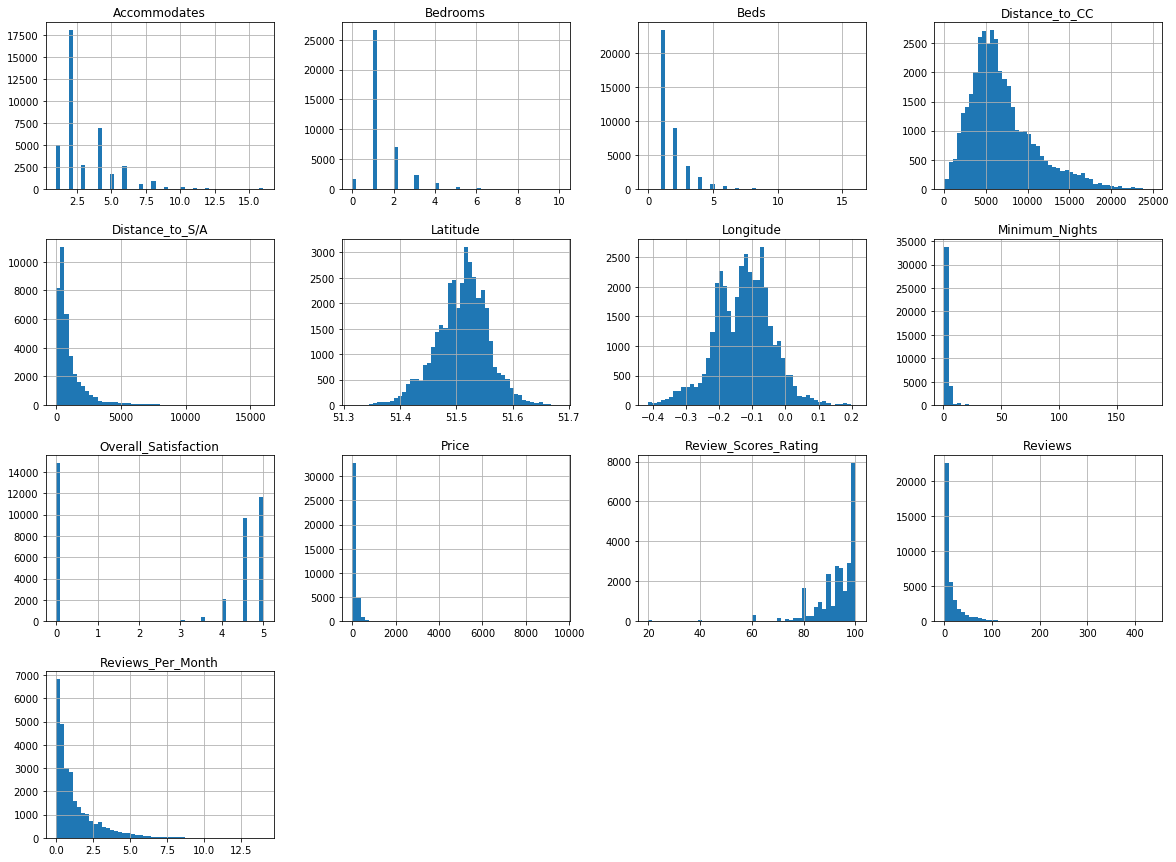

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

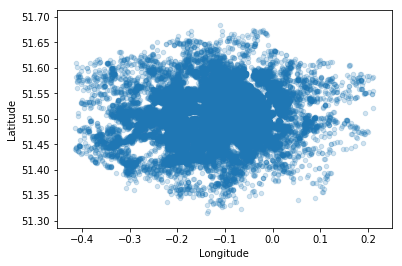

In [5]:
sf.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2)
plt.savefig('map1.png')

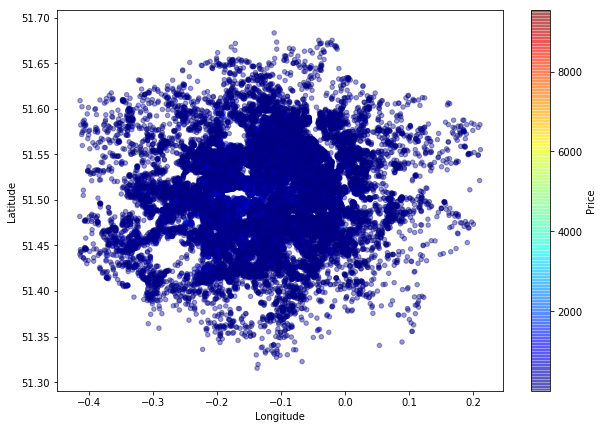

In [6]:
sf.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, figsize=(10,7), c="Price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('map2.png')
#这This image tells us that the most expensive houses sold were around city centre.

/Users/weisihan/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


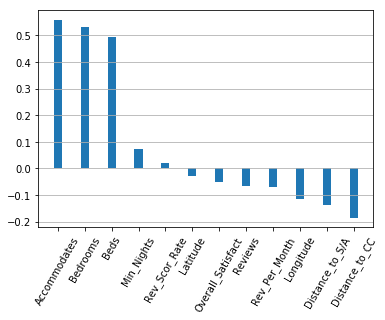

In [76]:
corr_matrix = sf.corr()
corr_matrix["Price"].sort_values(ascending=False)

arr=[0.558162, 0.529780, 0.493208, 0.074723, 0.021790, -0.028997, -0.051971, -0.065244, -0.070074, -0.115337, -0.136248,-0.184168]

%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(left = (1,2,3,4, 5, 6, 7, 8, 9, 10,11,12),height = arr,width =0.3)
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12),('Accommodates','Bedrooms','Beds','Min_Nights','Rev_Scor_Rate','Latitude','Overall_Satisfact','Reviews','Rev_Per_Month','Longitude','Distance_to_S/A','Distance_to_CC'),rotation=60)
plt.grid(axis='y')
#plt.title('Coefficients')
plt.show()
plt.savefig('coffients2.png')

# look at how much each independent variable correlates with this dependent variable.
# Price tends to increase when the finished sqft and the number of bathrooms go up. You can see a small negative correlation between the year built and the last sold price. And finally, coefficients close to zero indicates that there is no linear correlation.

/Users/weisihan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


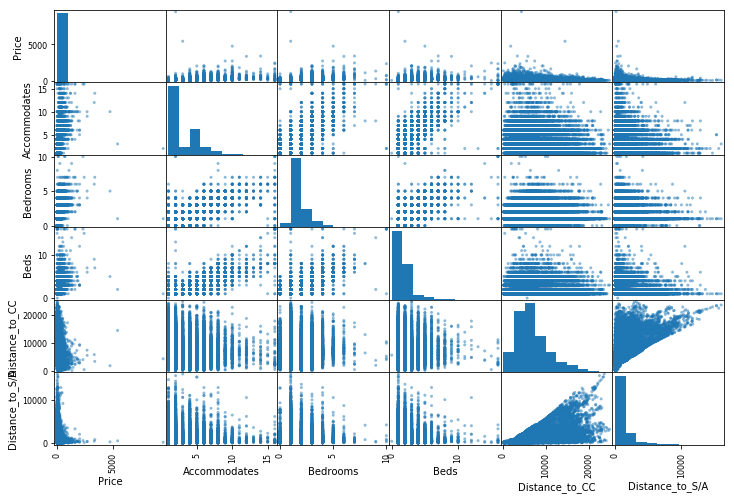

In [9]:
from pandas.tools.plotting import scatter_matrix

attributes = ["Price", "Accommodates", "Bedrooms", "Beds" ,"Distance_to_CC", "Distance_to_S/A"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

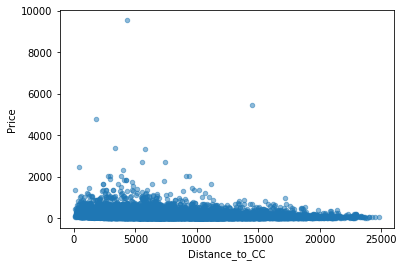

In [11]:
sf.plot(kind="scatter", x="Distance_to_CC", y="Price", alpha=0.5)
plt.axis
plt.savefig('scatter.png')

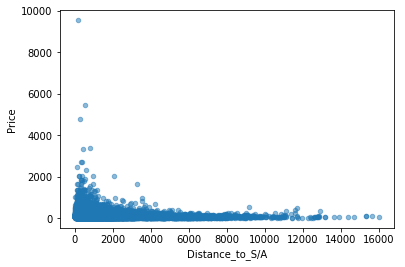

In [12]:
sf.plot(kind="scatter", x="Distance_to_S/A", y="Price", alpha=0.5)
plt.axis
plt.savefig('scatter.png')

In [58]:
sf.drop(sf.columns[[ 7, 8,9,10, 13, 14, 15]], axis=1, inplace=True)
sf.head()


,Accommodates,Bed_Type,Bedrooms,Beds,Borough,Distance_to_CC,Distance_to_S/A,Price,Property_Type,Room_Type
0,1,Real Bed,1,1.0,Kingston upon Thames,16451.52068,2294.648315,32,Apartment,Private room
1,2,Pull-out Sofa,1,1.0,Kingston upon Thames,15543.17042,3379.229895,47,Apartment,Private room
2,2,Real Bed,1,1.0,Kingston upon Thames,14997.82383,3807.186562,32,Apartment,Private room
3,2,Real Bed,1,1.0,Kingston upon Thames,15301.72028,3432.077481,54,House,Private room
4,2,Real Bed,1,2.0,Kingston upon Thames,15050.29825,4169.250888,65,House,Private room


In [59]:
sf.drop(sf.columns[[ 1,]], axis=1, inplace=True)
sf.head()

,Accommodates,Bedrooms,Beds,Borough,Distance_to_CC,Distance_to_S/A,Price,Property_Type,Room_Type
0,1,1,1.0,Kingston upon Thames,16451.52068,2294.648315,32,Apartment,Private room
1,2,1,1.0,Kingston upon Thames,15543.17042,3379.229895,47,Apartment,Private room
2,2,1,1.0,Kingston upon Thames,14997.82383,3807.186562,32,Apartment,Private room
3,2,1,1.0,Kingston upon Thames,15301.72028,3432.077481,54,House,Private room
4,2,1,2.0,Kingston upon Thames,15050.29825,4169.250888,65,House,Private room


In [60]:
X = sf[['Accommodates', 'Bedrooms', 'Beds', 'Property_Type', 'Room_Type','Distance_to_CC', 'Distance_to_S/A', 'Borough']]
Y = sf['Price']

m = pd.get_dummies(sf.Property_Type)
X = pd.concat([X, m], axis=1)
p = pd.get_dummies(sf.Room_Type)
X = pd.concat([X, p], axis=1)
q = pd.get_dummies(sf.Borough)
X = pd.concat([X, q], axis=1)
drops = ['Property_Type', 'Room_Type', 'Borough']
X.drop(drops, inplace=True, axis=1)
X.head()
X.columns


Index(['Accommodates', 'Bedrooms', 'Beds', 'Distance_to_CC', 'Distance_to_S/A',
       'Apartment', 'Bed & Breakfast', 'House', 'Other_proptype',
       'Entire home/apt', 'Private room', 'Shared room',
       'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object')

In [61]:
X['Beds'].fillna(X['Bedrooms'], inplace=True)

In [62]:
X[X.isnull().values==True]

,Accommodates,Bedrooms,Beds,Distance_to_CC,Distance_to_S/A,Apartment,Bed & Breakfast,House,Other_proptype,Entire home/apt,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster


In [63]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

/Users/weisihan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.5033


In [65]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 85.1348


In [66]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 43.5318


In [67]:
y_pred

array([  56.8556023 ,   58.02359619,   71.19142106, ...,  430.4590983 ,
        208.45224744,   50.81342982])

In [68]:
y_test.values



array([ 68,  54,  40, ..., 694, 129,  40])

In [69]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [70]:
mean_absolute_percentage_error(y_test.values, y_pred)

38.823061476091212

In [71]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))


Random Forest R squared": 0.4362


In [73]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 90.6957


In [74]:
mean_absolute_percentage_error(y_test.values, y_pred)

35.767795705965426

In [75]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [33]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))


Gradient Boosting R squared": 0.5441


In [34]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 81.5630


In [35]:
mean_absolute_percentage_error(y_test.values, y_pred)

34.763798709211848

In [37]:
feature_labels = np.array(['Accommodates', 'Bedrooms', 'Beds', 'Distance_to_CC', 'Distance_to_S/A',
       'Apartment', 'Bed & Breakfast', 'House', 'Other_proptype',
       'Entire home/apt', 'Private room', 'Shared room',
       'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Greenwich-0.00%
Brent-0.00%
Bexley-0.00%
Barking and Dagenham-0.00%
Enfield-0.00%
Havering-0.00%
Redbridge-0.00%
Bromley-0.00%
Other_proptype-0.00%
Croydon-0.00%
Hounslow-0.00%
Newham-0.00%
Sutton-0.00%
Ealing-0.00%
Kingston upon Thames-0.00%
Hillingdon-0.00%
Lewisham-0.00%
Barnet-0.03%
Shared room-0.05%
Bed & Breakfast-0.10%
Tower Hamlets-0.16%
Harrow-0.17%
Private room-0.44%
Camden-0.50%
Lambeth-0.51%
Southwark-0.55%
Wandsworth-0.58%
Haringey-0.59%
Merton-0.69%
Hammersmith and Fulham-0.75%
Waltham Forest-0.83%
Islington-0.85%
City of London-0.87%
Hackney-1.01%
House-1.25%
Richmond upon Thames-1.62%
Westminster-1.70%
Entire home/apt-2.75%
Apartment-3.41%
Distance_to_S/A-5.46%
Kensington and Chelsea-5.99%
Beds-8.39%
Accommodates-15.97%
Distance_to_CC-19.14%
Bedrooms-25.63%


In [ ]:
17.4

In [50]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()-+rect.get_width()/2.5, 1.03*height, '%s%%' % float(height))

/Users/weisihan/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


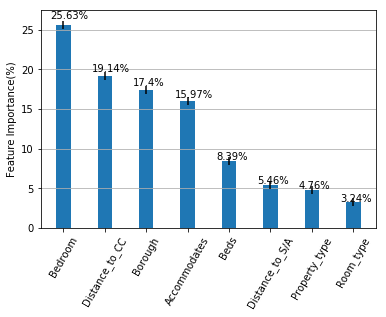

In [51]:
arr=[25.63,19.14,17.4,15.97,8.39,5.46,4.76,3.24]

%matplotlib inline
import matplotlib.pyplot as plt

plt.grid(axis='y')
plt.ylabel('Feature Importance(%)')
rect=plt.bar(left = (1,2,3,4, 5, 6, 7, 8),height = arr,width =0.35,align="center",yerr=0.5)
plt.xticks((1,2,3,4,5,6,7,8),('Bedroom','Distance_to_CC','Borough', 'Accommodates','Beds','Distance_to_S/A','Property_type','Room_type'),rotation=60)
autolabel(rect)




plt.show()
plt.savefig('importance.png')


